# Exercício de Programação 01

**Nome:** Deivison rodrigues jordão

**matricula:** 20200023728

**Diciplina:** Aprendizagem de máquina

### Importando Bibliotecas

In [110]:
import numpy as np
from random import *
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

## Preparando os Dados

### Dataset

In [111]:
#inicializando o gerador de números aleatórios para ter reprodutividade no futuro
seed(5)

#Criando o Dataset
X = [] 

for i in range(1000):
    X_aux = []
    X_aux.append(uniform(-1,1))
    X_aux.append(uniform(-1,1))
    X.append(X_aux)
    
X = np.array(X)

#Visualizando o Dataset
print(X)

[[ 0.24580339  0.48357398]
 [ 0.59038713  0.88490057]
 [ 0.47979715  0.84464999]
 ...
 [-0.55988832  0.21965358]
 [ 0.91302774  0.18153037]
 [-0.70124967 -0.59512236]]


### Função Alvo

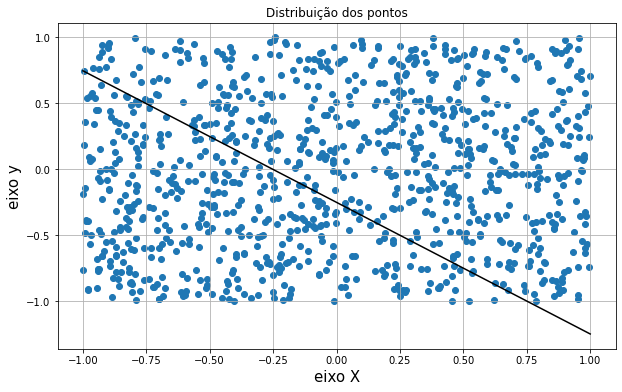

In [113]:
#Definindo reta como função alvo

Xx, Xy = zip(*X) #descompactando os x e y do dataset

a,b = uniform(-1,1),uniform(-1,1)

f = lambda x: a*x + b

#Visualizando reta alvo
plt.figure(figsize=(10, 6))
plt.title('Distribuição dos pontos')
plt.xlabel('eixo X', fontsize=15)
plt.ylabel('eixo y', fontsize=15)
plt.scatter(Xx, Xy)
plt.plot([-1, 1],[f(-1), f(1)],color = 'black') #considerando a=1 e b=0
plt.grid(True)
plt.show()

In [115]:
print(a,b)

-0.9973674762780744 -0.25187793694833416


### Rotulando Dataset

In [116]:
#Classificando o dataset em -1 e 1 diacordo com a reta alvo
def Correct_label_Dataset(X,a,b):
    clb = []
    
    for i in X:
        if a*i[0] + b > i[1]:
            clb.append(-1)
        else:
            clb.append(1)
    return clb

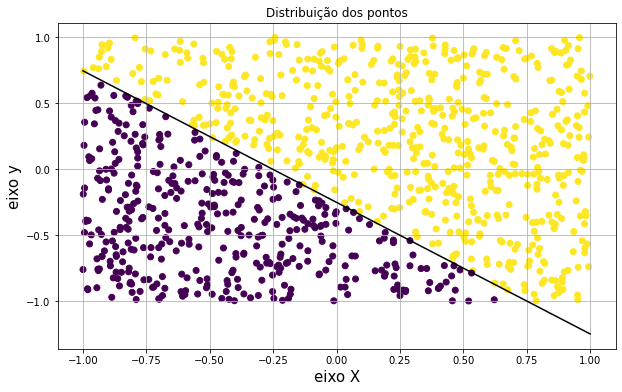

In [125]:
clb = Correct_label_Dataset(X,a,b)

#Visualizando reta alvo
plt.figure(figsize=(10, 6))
plt.title('Distribuição dos pontos')
plt.xlabel('eixo X', fontsize=15)
plt.ylabel('eixo y', fontsize=15)
plt.scatter(Xx, Xy,c = clb)
plt.plot([-1, 1],[f(-1), f(1)],color = 'black') #considerando a=1 e b=0
plt.grid(True)
plt.show()


## PLA (Perceptron Learning Algorithm)

In [171]:
#Particionando o Dataset em training e Test
X_train_10 = X[:10]
X_train_100 = X[10:110]
X_test = X[110:]

#Rotulos corretos para cada partição
Correct_label = Correct_label_Dataset(X,a,b)
Correct_label_train_10 = Correct_label[:10]
Correct_label_train_100 = Correct_label[10:110]
Test_validation = Correct_label[110:]

In [172]:
def fit(X,clb):
    W = np.zeros(3)
    
    #Lista de pontos classificados incorretamente
    ICP = builder_ICP(X,W,clb)
    while(len(ICP) > 0):
        rand_ICP = choice(ICP) #escolhe um ponto ICP aleatorio
        W[0] += rand_ICP[1]
        W[1] += rand_ICP[1] * rand_ICP[0][0]
        W[2] += rand_ICP[1] * rand_ICP[0][1]
        
        #Visualização do processo
        preview_function(X,W,a,b,clb)
        
        #cronstroi novamente a Lista de pontos classificados incorretamente
        ICP = builder_ICP(X,W,clb)
    return W

In [173]:
def builder_ICP(X,W,clb): #contrutor da lista de pontos classificados incorretamente
    
    list_index = []
    ICP = []
    
    for i in range(len(clb)):
        if clb[i] !=  predict_function(X[i],W):
            list_index.append(i)
            
    for i in list_index:
        ICP.append([X[i],clb[i]])
        
    return ICP

In [183]:
def predict_function(X,W):
    x, y = X[0],X[1]
    #t = (W[1]/W[2])*x + W[0]
    t = W[1] * x + W[2] * y + W[0]
    
    #return activation_function(t,y)
    return activation_function(t)

In [179]:
#ef activation_function(t,y):
def activation_function(t):
    #f t < y:
    if t > 0:
        return 1
    else:
        return -1

In [185]:
def preview_function(X,W,a_target,b_target,Correct_label):
    
    f = lambda x: a_target*x + b_target
    
    x,y = zip(*X)
    
    #Visualizando classificação
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.title('Distribuição dos pontos')
    plt.xlabel('eixo X', fontsize=15)
    plt.ylabel('eixo y', fontsize=15)
    plt.scatter(x, y, c=Correct_label)
    a = W[1]/W[2] if W[2] else 0
    print(W[0],-a)
    plt.plot([-1, 1],[W[0] + a,W[0] - a],color = 'blue')
    plt.plot([-1, 1],[f(-1), f(1)],color = 'black') 
    plt.grid(True)
    plt.show()
    sleep(0.1)

2.0 -0.9815078642845562


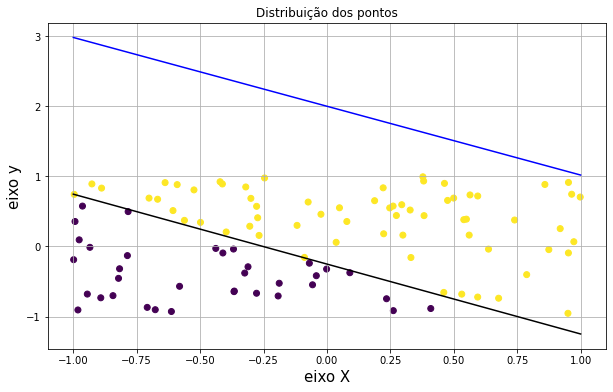

[2.         7.30829565 7.44598786]


In [186]:
teste = fit(X_train_100,Correct_label_train_100)
print(teste)